#Scrap news website and summarize news using the [newsapi](https://newsapi.org/) 

In [0]:
import pprint
import requests # 2.19.1
import requests
import json
import re
import pandas as pd
from pandas.io.json import json_normalize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
#replace with your developer key from newapi.org
secret = XXXXXXXXX

In [0]:
everything_news_url = 'https://newsapi.org/v2/everything'

In [0]:
# Specify the query and number of returns
parameters = {
 'q': 'economy covid coronavirus', # query phrase
 'pageSize': 30, # maximum is 100
 'apiKey': secret # your own API key
}


In [0]:
# Make the request
response = requests.get(everything_news_url, params=parameters)
# Convert the response to JSON format and pretty print it
response_json = response.json()

In [249]:
#build dataframe
data = []
for i in response_json['articles']:
  data.append(
        {
            'Title': i['title'],
            'Description': i['description'],
            'Source':i['source']['name']
        }
    )

df = pd.DataFrame(data)
# len(df)
df.head(5)

,Title,Description,Source
0,Technology and ethics in the coronavirus economy,"The last two decades have ushered in significant change and transformation. I believe the 2020s will be dispositive in redefining the pillars of our economy, and COVID-19 magnifies this greatly.",TechCrunch
1,Coronavirus: Can live-streaming save China's economy?,"In China, the live-streaming industry has become an important platform for economic recovery.",BBC News
2,"Sales startup People.ai lays off 18% of staff, raises debt round amid COVID-19 uncertainty","Another startup has turned to downsizing and fund raising to help weather the uncertainty around the economy amid the global coronavirus health pandemic. People.ai, a predictive sales startup backed by Andreessen Horowitz, Iconic, Lightspeed and other investo…",TechCrunch
3,Night burials amid Tanzania's coronavirus defiance,Some fear the East African nation is downplaying the pandemic as it seeks to protect its economy.,BBC News
4,Coronavirus: Spain begins to ease lockdown to revive economy,"Manufacturing and construction workers can return to work, but other people must remain at home.",BBC News


In [209]:
#sentiment analysis of Article titles

#load nlkt 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
#loop through Description and assign sentiment score
i=0
df_sentiment = df
#empty list to hold computed 'compound' VADER scores
compval1 = [ ]


while (i<len(df_sentiment)):

    k = analyser.polarity_scores(df_sentiment.iloc[i]['Description'])
    compval1.append(k['compound'])
    
    i = i+1

In [239]:
df_sentiment['Sentiment score'] = compval1
df_sentiment.head(5)

,Title,Description,Source,Sentiment score
0,Technology and ethics in the coronavirus economy,"The last two decades have ushered in significant change and transformation. I believe the 2020s will be dispositive in redefining the pillars of our economy, and COVID-19 magnifies this greatly.",TechCrunch,0.2023
1,Coronavirus: Can live-streaming save China's economy?,"In China, the live-streaming industry has become an important platform for economic recovery.",BBC News,0.2023
2,"Sales startup People.ai lays off 18% of staff, raises debt round amid COVID-19 uncertainty","Another startup has turned to downsizing and fund raising to help weather the uncertainty around the economy amid the global coronavirus health pandemic. People.ai, a predictive sales startup backed by Andreessen Horowitz, Iconic, Lightspeed and other investo…",TechCrunch,0.1027
3,Night burials amid Tanzania's coronavirus defiance,Some fear the East African nation is downplaying the pandemic as it seeks to protect its economy.,BBC News,-0.1531
4,Coronavirus: Spain begins to ease lockdown to revive economy,"Manufacturing and construction workers can return to work, but other people must remain at home.",BBC News,0.0000


In [0]:
#Assigning score sentiment categories
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(df_sentiment)):
    if ((df_sentiment.iloc[i]['Sentiment score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((df_sentiment.iloc[i]['Sentiment score'] > 0) & (df_sentiment.iloc[i]['Sentiment score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((df_sentiment.iloc[i]['Sentiment score'] <= 0)):
        predicted_value.append('negative')
        i = i+1

In [0]:
df_sentiment['sentiment'] = predicted_value


In [250]:
#Lets have a look at some good news in the midst of so much negative news 
positive = df_sentiment.loc[df_sentiment['sentiment'] == 'neutral']
positive

,Title,Description,Source,Sentiment score,sentiment
0,Technology and ethics in the coronavirus economy,"The last two decades have ushered in significant change and transformation. I believe the 2020s will be dispositive in redefining the pillars of our economy, and COVID-19 magnifies this greatly.",TechCrunch,0.2023,neutral
1,Coronavirus: Can live-streaming save China's economy?,"In China, the live-streaming industry has become an important platform for economic recovery.",BBC News,0.2023,neutral
2,"Sales startup People.ai lays off 18% of staff, raises debt round amid COVID-19 uncertainty","Another startup has turned to downsizing and fund raising to help weather the uncertainty around the economy amid the global coronavirus health pandemic. People.ai, a predictive sales startup backed by Andreessen Horowitz, Iconic, Lightspeed and other investo…",TechCrunch,0.1027,neutral
11,Hong Kong to Give Free Masks to Every Family As It Prepares to Reopen Economy,Hong Kong’s government announced a plan to give every family at least 10 free face masks as it prepares to reopen large parts of society later this week. The region of 7 million people has experienced 14 full days without any community transmission of the new…,Gizmodo.com,0.5106,neutral
14,"Answering Your Coronavirus Questions: New Symptoms, Economy And Virtual Celebrations","On this broadcast of The National Conversation, we answer your questions about the economy, mental health and new symptoms of COVID-19. We'll also look at how people are celebrating big life events.",Npr.org,0.5719,neutral
24,Driverless vehicles in the age of the novel coronavirus,"The COVID-19 pandemic has led to different outcomes for different businesses. While some have stood to benefit (think Zoom, Facebook and bidet startup Tushy), others have been hit hard and laid off employees in order to survive. But there are some that fall s…",TechCrunch,0.3818,neutral
25,"Instant view: Coronavirus ravaged U.S. payrolls in April, 20.5 mln jobs lost","The U.S. economy lost a staggering 20.5 million jobs in April, the steepest plunge in payrolls since the Great Depression and the starkest sign yet of how the novel coronavirus pandemic is battering the world's biggest economy.",Reuters,0.1027,neutral


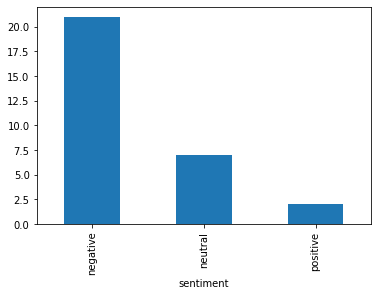

In [214]:
#Plot bar chart showing the sentiment levels
df_sentiment.groupby('sentiment').size().plot(kind='bar')

In [0]:
#word cloud to visualize most words in title

words = ' '.join(df['Title'])

wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=1500,
                      height=1250
                     ).generate(words)

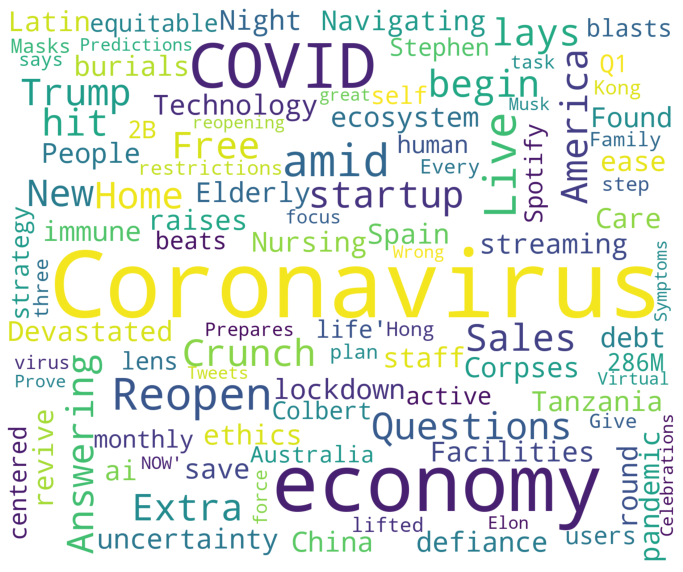

In [217]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [218]:
# Create an empty string
text_combined = ''
# Loop through all the headlines and add them to 'text_combined'
for i in response_json['articles']:
 text_combined += i['title'] + ' ' # add a space after every headline, so the first and last words are not glued together
# Print the first 300 characters to screen for inspection
print(text_combined[0:300])


Technology and ethics in the coronavirus economy Coronavirus: Can live-streaming save China's economy? Sales startup People.ai lays off 18% of staff, raises debt round amid COVID-19 uncertainty Night burials amid Tanzania's coronavirus defiance Coronavirus: Spain begins to ease lockdown to revive ec


In [0]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
url = "http://techcrunch.com/2020/04/17/sales-startup-people-ai-lays-off-18-of-staff-raises-debt-round-amid-covid-19-uncertainty/"

page = requests.get(url).text

# Turn page into BeautifulSoup object to access HTML tags
soup = BeautifulSoup(page)

# Pares HTML for article body

# Get text from all <p> tags.
p_tags = soup.find_all('p')
# Get the text from each of the “p” tags and strip surrounding whitespace.
p_tags_text = [tag.get_text().strip() for tag in p_tags]
#convert to string for easier manipulation
text = " ".join([word for word in p_tags_text
                            if '\xa0' not in word
                 ])


In [220]:
text

'Another startup has turned to downsizing and fund raising to help weather the uncertainty around the economy amid the global coronavirus health pandemic. People.ai, a predictive sales startup backed by Andreessen Horowitz, Iconiq, Lightspeed and other investors and last year valued at around $500 million, has laid off around 30 people, working out to about 18% of staff, TechCrunch has learned and confirmed. Alongside that, the company has quietly raised a debt round in the “tens of millions of dollars” to make strategic investments in new products and potentially other moves. Oleg Rogynskyy, the founder and CEO, said the layoffs were made not because business has slowed down, but to help the company shore up for whatever may lie ahead. “We still have several years of runway with what we’ve raised,” he noted (it has raised just under $100 million in equity to date). “But no one knows the length of the downturn, so we wanted to make sure we could sustain the business through it.” Specif

In [221]:
#summarize text

from gensim.summarization.summarizer import summarize
print(summarize(text, word_count= 300))


People.ai, a predictive sales startup backed by Andreessen Horowitz, Iconiq, Lightspeed and other investors and last year valued at around $500 million, has laid off around 30 people, working out to about 18% of staff, TechCrunch has learned and confirmed.
Alongside that, the company has quietly raised a debt round in the “tens of millions of dollars” to make strategic investments in new products and potentially other moves.
People.ai’s  software tracks the full scope of communication touch points between sales teams and customers, supposedly negating the tedious manual process of activity logging for SDRs. The company’s machine learning tech is also meant to generate the average best way to close a deal — educating customer success teams about where salespeople may be deviating from a proven strategy.
People.ai is one of a number of well-funded tech startups that is making hard choices on business strategy, costs and staffing in the current climate.
Some businesses are getting directl